In [1]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


In [3]:
kmeans = KMeans(n_clusters=10, random_state=141)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)

[9 9 9 1 3 4 3 4 4 4 0 5 5 0 4 0 0 5 6 4 1 7 0 6 6 5 0 3 5 5 3 4 5 9 5 5 4
 1 4 4 4 1 3 4 4 3 7 4 1 4 1 4 1 5 0 1 6 0 1 7 7 7 0 7 4 0 7 1 7 1 9 7 3 4
 1 5 1 3 3 1 1 1 2 5 1 3 4 3 1 4 4 4 4 4 0 9 1 7 1 4 4 7 1 7 7 4 1 1 6 1 7
 1 4 7 7 1 7 0 5 5 1 3 6 4 1 4 4 3 4 3 1 0 5 0 3 1 1 1 0 7 7 5 1 1 7 1 1 4
 4 4 1 7 7 7 4 1 5 0 1 1 1 3 6 1 6 4 7 5 3 4 1 0 0 7 7 7 7 0 1 1 2 6 5 1 0
 7 5 1 1 1 4 1 7 4 4 1 4 5 3 0 1 5 6 0 1 0 7 5 1 0 9 1 2 0 4 4 1 7 9 6 4 4
 7 0 4 4 7 4 1 4 5 1 1 9 7 4 2 9 4 5 4 1 1 4 3 7 1 1 7 1 6 1 9 5 9 4 9 0 5
 0 9 5 5 0 5 2 7 4 1 7 4 1 6 7 5 1 1 5 4 4 9 1 3 0 1 1 1 1 7 1 4 4 1 1 1 4
 7 1 4 7 6 1 9 7 1 1 1 7 4 4 1 4 1 1 7 1 1 3 7 1 7 9 1 9 1 1 4 1 0 0 0 1 7
 1 1 5 1 9 7 2 4 7 7 3 1 7 1 0 1 1 1 0 2 0 1 1 1 4 7 7 1 1 1 0 4 9 9 1 2 6
 5 4 3 9 4 0 7 4 4 1 1 7 1 1 1 4 1 4 1 5 7 7 5 6 1 4 4 1 1 1 5 1 1 1 1 1 0
 1 5 1 1 1 7 0 0 1 7 3 1 1 1 4 1 4 7 7 7 1 7 1 4 1 3 3 4 4 1 4 4 4 1 5 4 7
 5 1 5 4 4 6 1 3 1 4 1 4 1 1 1 7 3 8 4 1 4 4 4 7 5 1 7 1 0 1 7 1 4 4 1 0 1
 4 4 4 0 1 4 9 1 0 1 5 5 

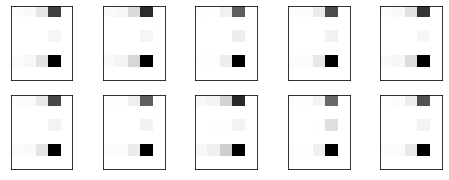

In [4]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [5]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.9068541300527241

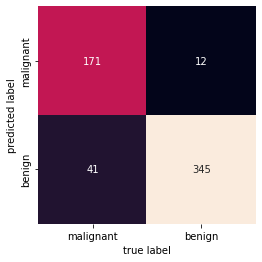

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');